In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
#%autoreload 2

In [6]:
!ls data/


'test (2).csv'	'train (1).csv'


In [94]:
columns_to_absolutely_ignore = ['Street', 'PoolQC', 'FireplaceQu']
columns_to_probably_ignore = ['Alley', 'Fence', 'LotFrontage']
columns_to_ignore = list(dict.fromkeys(columns_to_absolutely_ignore + columns_to_probably_ignore))

df = pd.read_csv('data/train (1).csv').drop(columns=columns_to_ignore)
# .value_counts()
# len(pd.read_csv('data/train (1).csv').columns)

In [85]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [76]:
# Columns to classify as binary
df['MiscFeature'] = df['MiscFeature'].apply(lambda x: 0 if x != 'Shed' else 1)

In [77]:
# df.iloc[:, 0:10]

In [70]:
# df['MiscFeature'].value_counts()

# df['MiscFeature'] = df['MiscFeature'].apply(lambda x: 0 if x != 'Shed' else 1)

In [95]:
# df['LotFrontage'].value_counts()


In [44]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
CentralAir

In [116]:
df[df.nunique().sort_values().index[0]].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [115]:
# df.describe()
# df.dtypes
# df.isnull().count().sort_values("desc")
# df.isnull().sum().sort_values()
df.nunique().sort_values().index[0]

'CentralAir'

In [42]:
df.sort_index(ascending=False)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
0        1          60       RL         65.0     8450   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1459      6   2008        WD         Normal     147500  
1458      4   2010        WD         Normal     142125  
1457      5   2010        WD         Normal     266500  
1456      2   2010        WD         Normal     210000  
1455      8   2007        WD         Normal     175000  
...     ...    ...       ...            ...        ...  
4        12   2008        WD         Normal     250000  
3         2   2006        WD        Abnorml     140000  
2         9   2008        WD         Normal     223500  
1         5   2007        WD         Normal     181500  
0         2   2008        WD         Normal     208500  

[1460 rows x 81 columns]

In [119]:
df.describe().applymap(lambda x: round(x))

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
count  1460        1460     1460         1460         1460       1460   
mean    730          57    10517            6            6       1971   
std     422          42     9981            1            1         30   
min       1          20     1300            1            1       1872   
25%     366          20     7554            5            5       1954   
50%     730          50     9478            6            5       1973   
75%    1095          70    11602            7            6       2000   
max    1460         190   215245           10            9       2010   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
count          1460        1452        1460        1460  ...        1460   
mean           1985         104         444          47  ...          94   
std              21         181         456         161  ...         125   
min            1950           0           0           0  ...           0   
25%            1967           0           0           0  ...           0   
50%            1994           0         384           0  ...           0   
75%            2004         166         712           0  ...         168   
max            2010        1600        5644        1474  ...         857   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
count         1460           1460       1460         1460      1460     1460   
mean            47             22          3           15         3       43   
std             66             61         29           56        40      496   
min              0              0          0            0         0        0   
25%              0              0          0            0         0        0   
50%             25              0          0            0         0        0   
75%             68              0          0            0         0        0   
max            547            552        508          480       738    15500   

       MoSold  YrSold  SalePrice  
count    1460    1460       1460  
mean        6    2008     180921  
std         3       1      79443  
min         1    2006      34900  
25%         5    2007     129975  
50%         6    2008     163000  
75%         8    2009     214000  
max        12    2010     755000  

[8 rows x 37 columns]

In [128]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [129]:
round(df.corr(),2).iloc[:,0:75]

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
Id             1.00        0.01    -0.03        -0.03         0.01      -0.01   
MSSubClass     0.01        1.00    -0.14         0.03        -0.06       0.03   
LotArea       -0.03       -0.14     1.00         0.11        -0.01       0.01   
OverallQual   -0.03        0.03     0.11         1.00        -0.09       0.57   
OverallCond    0.01       -0.06    -0.01        -0.09         1.00      -0.38   
YearBuilt     -0.01        0.03     0.01         0.57        -0.38       1.00   
YearRemodAdd  -0.02        0.04     0.01         0.55         0.07       0.59   
MasVnrArea    -0.05        0.02     0.10         0.41        -0.13       0.32   
BsmtFinSF1    -0.01       -0.07     0.21         0.24        -0.05       0.25   
BsmtFinSF2    -0.01       -0.07     0.11        -0.06         0.04      -0.05   
BsmtUnfSF     -0.01       -0.14    -0.00         0.31        -0.14       0.15   
TotalBsmtSF   -0.02       -0.24     0.26         0.54        -0.17       0.39   
1stFlrSF       0.01       -0.25     0.30         0.48        -0.14       0.28   
2ndFlrSF       0.01        0.31     0.05         0.30         0.03       0.01   
LowQualFinSF  -0.04        0.05     0.00        -0.03         0.03      -0.18   
GrLivArea      0.01        0.07     0.26         0.59        -0.08       0.20   
BsmtFullBath   0.00        0.00     0.16         0.11        -0.05       0.19   
BsmtHalfBath  -0.02       -0.00     0.05        -0.04         0.12      -0.04   
FullBath       0.01        0.13     0.13         0.55        -0.19       0.47   
HalfBath       0.01        0.18     0.01         0.27        -0.06       0.24   
BedroomAbvGr   0.04       -0.02     0.12         0.10         0.01      -0.07   
KitchenAbvGr   0.00        0.28    -0.02        -0.18        -0.09      -0.17   
TotRmsAbvGrd   0.03        0.04     0.19         0.43        -0.06       0.10   
Fireplaces    -0.02       -0.05     0.27         0.40        -0.02       0.15   
GarageYrBlt    0.00        0.09    -0.02         0.55        -0.32       0.83   
GarageCars     0.02       -0.04     0.15         0.60        -0.19       0.54   
GarageArea     0.02       -0.10     0.18         0.56        -0.15       0.48   
WoodDeckSF    -0.03       -0.01     0.17         0.24        -0.00       0.22   
OpenPorchSF   -0.00       -0.01     0.08         0.31        -0.03       0.19   
EnclosedPorch  0.00       -0.01    -0.02        -0.11         0.07      -0.39   
3SsnPorch     -0.05       -0.04     0.02         0.03         0.03       0.03   
ScreenPorch    0.00       -0.03     0.04         0.06         0.05      -0.05   
PoolArea       0.06        0.01     0.08         0.07        -0.00       0.00   
MiscVal       -0.01       -0.01     0.04        -0.03         0.07      -0.03   
MoSold         0.02       -0.01     0.00         0.07        -0.00       0.01   
YrSold         0.00       -0.02    -0.01        -0.03         0.04      -0.01   
SalePrice     -0.02       -0.08     0.26         0.79        -0.08       0.52   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                    -0.02       -0.05       -0.01       -0.01      -0.01   
MSSubClass             0.04        0.02       -0.07       -0.07      -0.14   
LotArea                0.01        0.10        0.21        0.11      -0.00   
OverallQual            0.55        0.41        0.24       -0.06       0.31   
OverallCond            0.07       -0.13       -0.05        0.04      -0.14   
YearBuilt              0.59        0.32        0.25       -0.05       0.15   
YearRemodAdd           1.00        0.18        0.13       -0.07       0.18   
MasVnrArea             0.18        1.00        0.26       -0.07       0.11   
BsmtFinSF1             0.13        0.26        1.00       -0.05      -0.50   
BsmtFinSF2            -0.07       -0.07       -0.05        1.00      -0.21   
BsmtUnfSF              0.18        0.11       -0.50       -0.21       1.00   
To

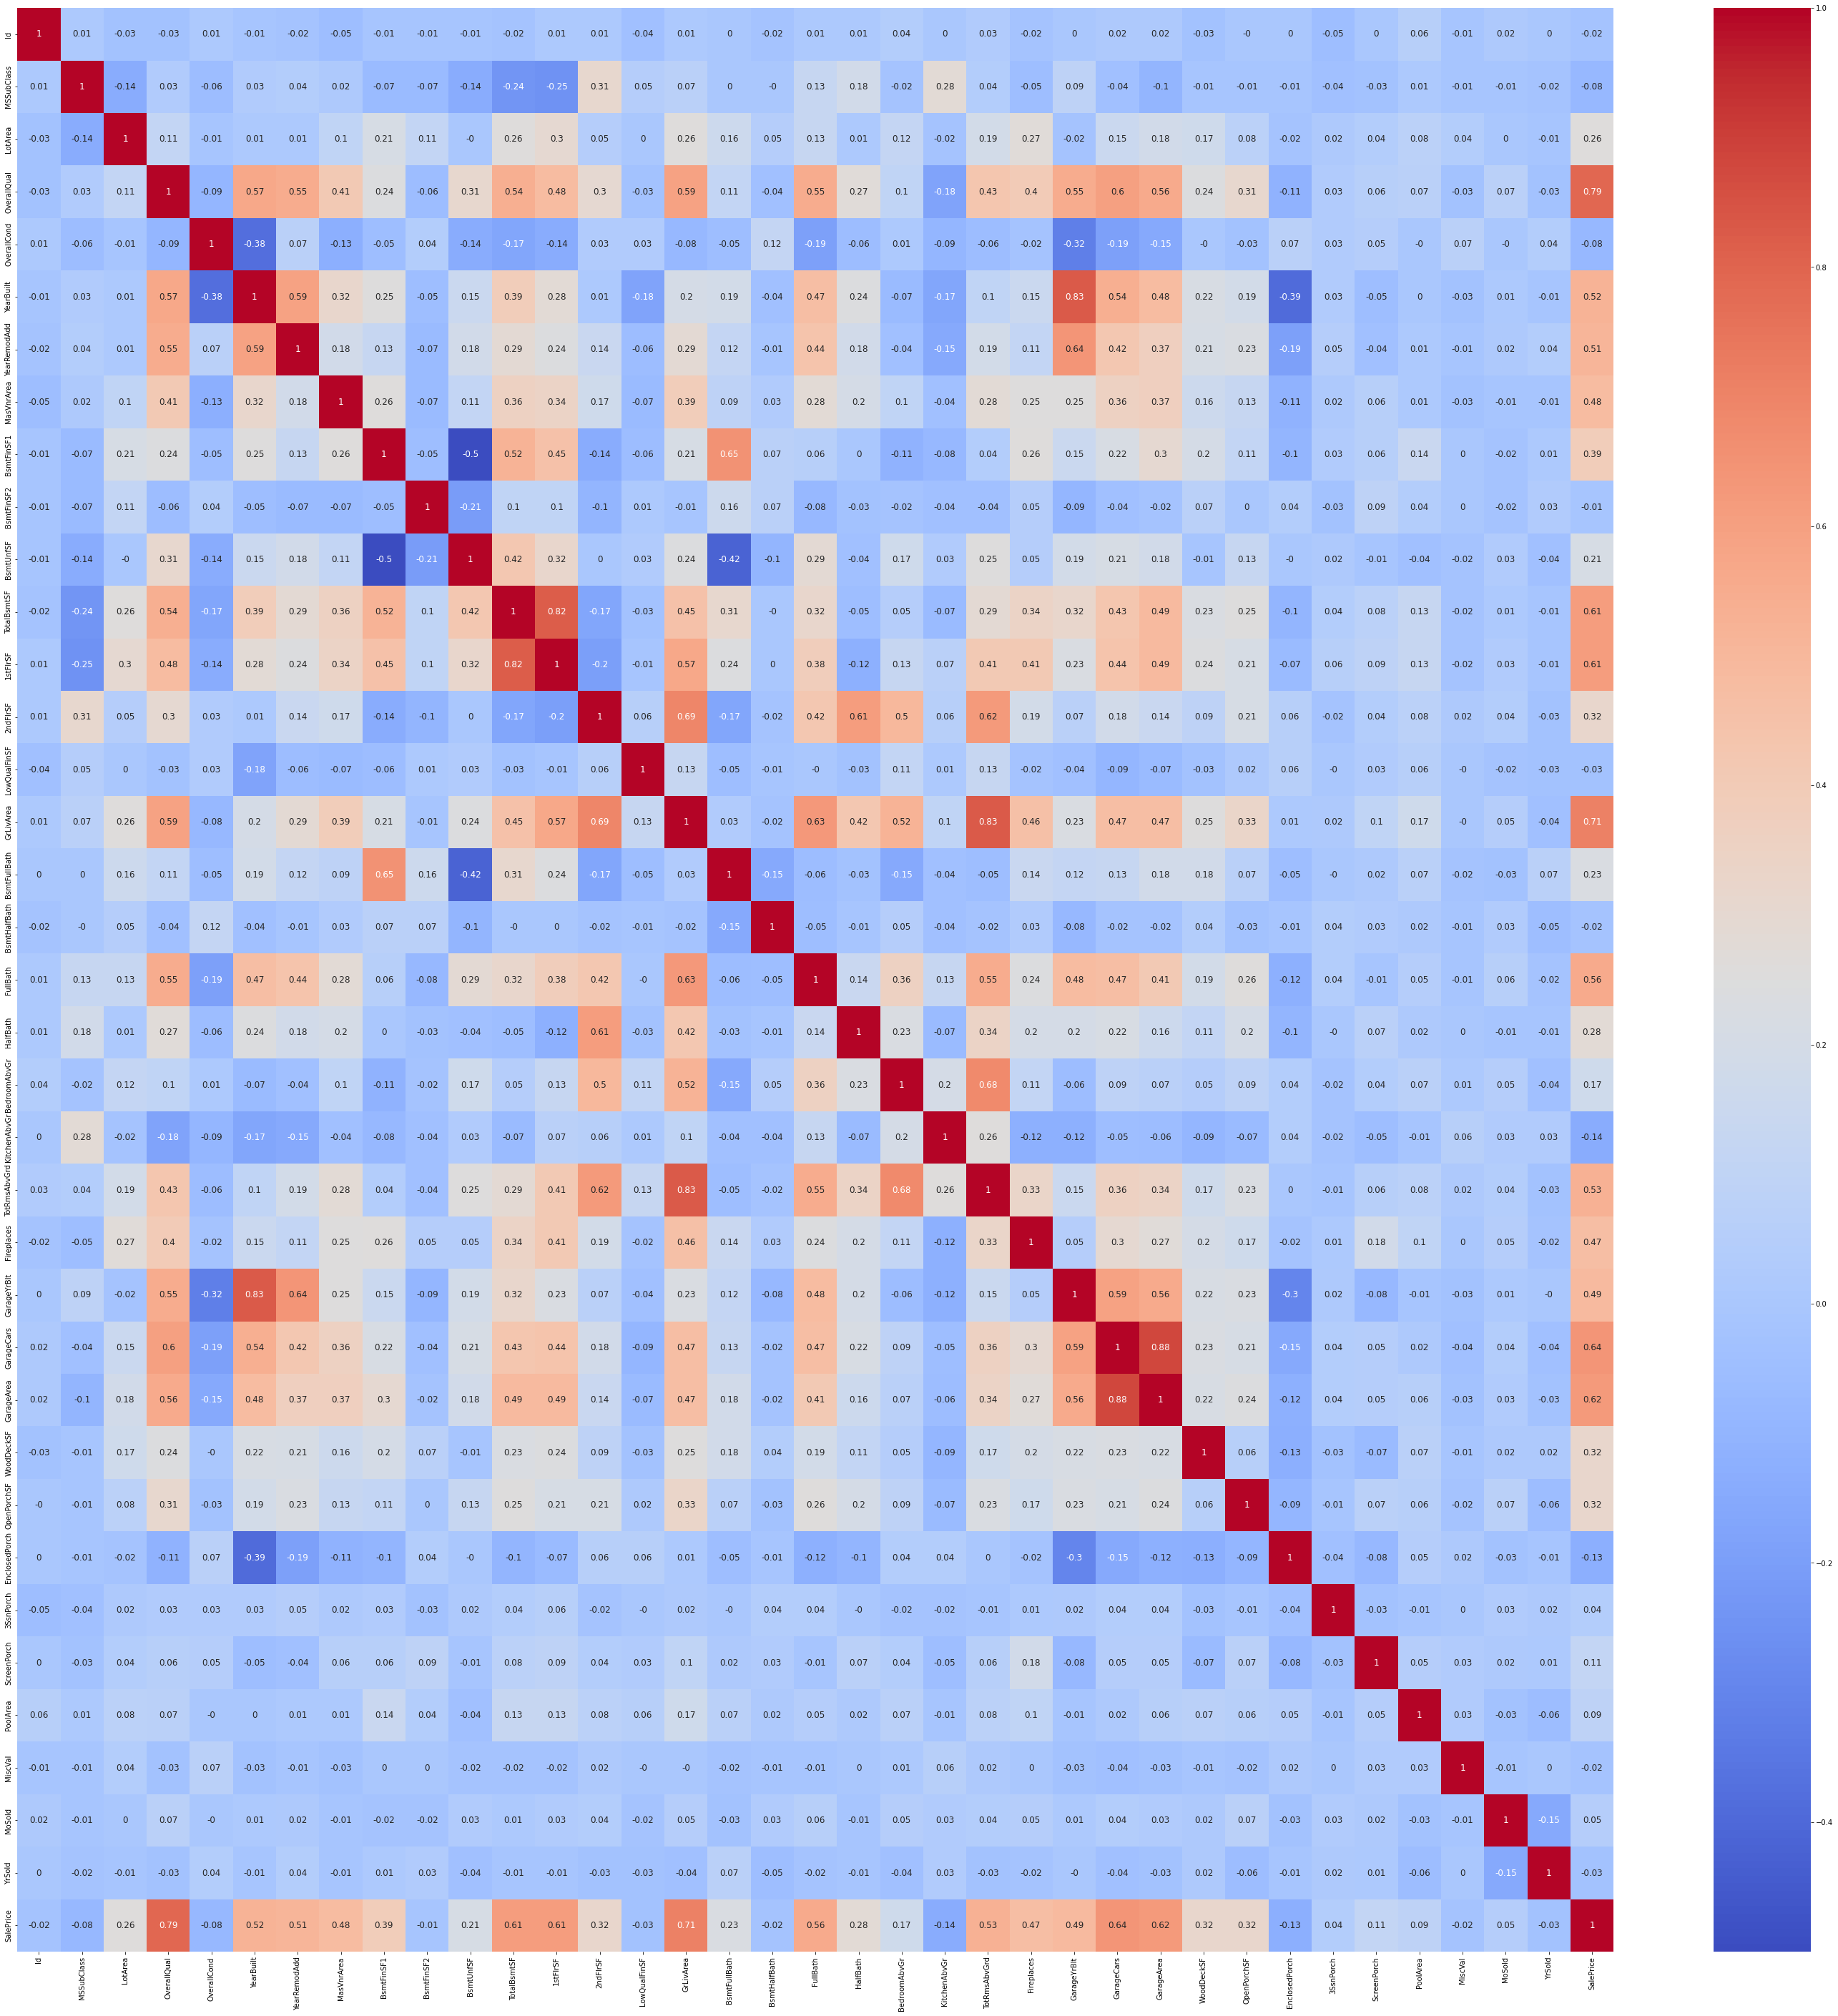

In [133]:
plt.figure(figsize = (50,50))
sns.heatmap(round(df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

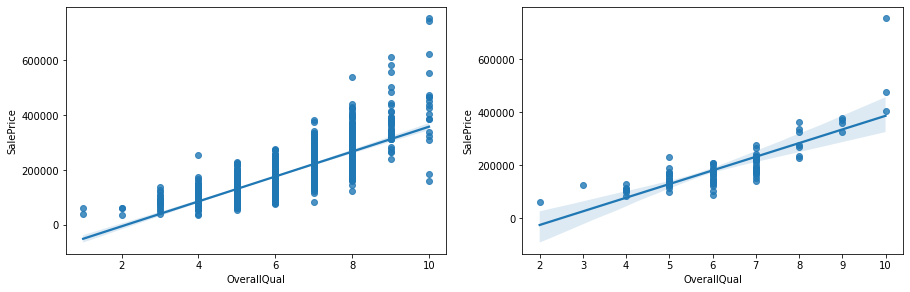

In [138]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='OverallQual', y='SalePrice', data=df, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='OverallQual', y='SalePrice', data=df.sample(100, random_state=9), ci=95);

In [144]:
# import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols(formula = 'SalePrice ~ OverallQual + GrLivArea', data=df).fit()
# model = sm.OLS(Y, X).fit() # Finds the best beta
# model.predict(X) # The Y_pred (regression-line)

In [145]:
model.params

Intercept     -104092.669636
OverallQual     32849.047441
GrLivArea          55.862226
dtype: float64

In [150]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns


Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
5        6          50    14115            5            5       1993   
6        7          20    10084            8            5       2004   
7        8          60    10382            7            6       1973   
8        9          50     6120            7            5       1931   
9       10         190     7420            5            6       1939   
10      11          20    11200            5            5       1965   
11      12          60    11924            9            5       2005   
12      13          20    12968            5            6       1962   
13      14          20    10652            7            5       2006   
14      15          20    10920            6            5       1960   
15      16          45     6120            7            8       1929   
16      17          20    11241            6            7       1970   
17      18          90    10791            4            5       1967   
18      19          20    13695            5            5       2004   
19      20          20     7560            5            6       1958   
20      21          60    14215            8            5       2005   
21      22          45     7449            7            7       1930   
22      23          20     9742            8            5       2002   
23      24         120     4224            5            7       1976   
24      25          20     8246            5            8       1968   
25      26          20    14230            8            5       2007   
26      27          20     7200            5            7       1951   
27      28          20    11478            8            5       2007   
28      29          20    16321            5            6       1957   
29      30          30     6324            4            6       1927   
30      31          70     8500            4            4       1920   
31      32          20     8544            5            6       1966   
32      33          20    11049            8            5       2007   
33      34          20    10552            5            5       1959   
34      35         120     7313            9            5       2005   
35      36          60    13418            8            5       2004   
36      37          20    10859            5            5       1994   
37      38          20     8532            5            6       1954   
38      39          20     7922            5            7       1953   
39      40          90     6040            4            5       1955   
40      41          20     8658            6            5       1965   
41      42          20    16905            5            6       1959   
42      43          85     9180            5            7       1983   
43      44          20     9200            5            6       1975   
44      45          20     7945            5            6       1959   
45      46         120     7658            9            5       2005   
46      47          50    12822            7            5       2003   
47      48          20    11096            8            5       2006   
48      49         190     4456            4            5       1920   
49      50          20     7742            5            7       1966   
50      51          60    13869            6            6       1997   
51      52          50     6240            6            6       1934   
52      53          90     8472            5            5       1963   
53      54          20    50271            9            5       1981   
54      55          80     7134            5    

In [149]:
df

Id  MSSubClass MSZoning  LotArea LotShape LandContour Utilities  \
0        1          60       RL     8450      Reg         Lvl    AllPub   
1        2          20       RL     9600      Reg         Lvl    AllPub   
2        3          60       RL    11250      IR1         Lvl    AllPub   
3        4          70       RL     9550      IR1         Lvl    AllPub   
4        5          60       RL    14260      IR1         Lvl    AllPub   
5        6          50       RL    14115      IR1         Lvl    AllPub   
6        7          20       RL    10084      Reg         Lvl    AllPub   
7        8          60       RL    10382      IR1         Lvl    AllPub   
8        9          50       RM     6120      Reg         Lvl    AllPub   
9       10         190       RL     7420      Reg         Lvl    AllPub   
10      11          20       RL    11200      Reg         Lvl    AllPub   
11      12          60       RL    11924      IR1         Lvl    AllPub   
12      13          20       RL    12968      IR2         Lvl    AllPub   
13      14          20       RL    10652      IR1         Lvl    AllPub   
14      15          20       RL    10920      IR1         Lvl    AllPub   
15      16          45       RM     6120      Reg         Lvl    AllPub   
16      17          20       RL    11241      IR1         Lvl    AllPub   
17      18          90       RL    10791      Reg         Lvl    AllPub   
18      19          20       RL    13695      Reg         Lvl    AllPub   
19      20          20       RL     7560      Reg         Lvl    AllPub   
20      21          60       RL    14215      IR1         Lvl    AllPub   
21      22          45       RM     7449      Reg         Bnk    AllPub   
22      23          20       RL     9742      Reg         Lvl    AllPub   
23      24         120       RM     4224      Reg         Lvl    AllPub   
24      25          20       RL     8246      IR1         Lvl    AllPub   
25      26          20       RL    14230      Reg         Lvl    AllPub   
26      27          20       RL     7200      Reg         Lvl    AllPub   
27      28          20       RL    11478      Reg         Lvl    AllPub   
28      29          20       RL    16321      IR1         Lvl    AllPub   
29      30          30       RM     6324      IR1         Lvl    AllPub   
30      31          70  C (all)     8500      Reg         Lvl    AllPub   
31      32          20       RL     8544      IR1         Lvl    AllPub   
32      33          20       RL    11049      Reg         Lvl    AllPub   
33      34          20       RL    10552      IR1         Lvl    AllPub   
34      35         120       RL     7313      Reg         Lvl    AllPub   
35      36          60       RL    13418      Reg         Lvl    AllPub   
36      37          20       RL    10859      Reg         Lvl    AllPub   
37      38          20       RL     8532      Reg         Lvl    AllPub   
38      39          20       RL     7922      Reg         Lvl    AllPub   
39      40          90       RL     6040      Reg         Lvl    AllPub   
40      41          20       RL     8658      Reg         Lvl    AllPub   
41      42          20       RL    16905      Reg         Lvl    AllPub   
42      43          85       RL     9180      IR1         Lvl    AllPub   
43      44          20       RL     9200      IR1         Lvl    AllPub   
44      45          20       RL     7945      Reg         Lvl    AllPub   
45      46         120       RL     7658      Reg         Lvl    AllPub   
46      47          50       RL    12822      IR1         Lvl    AllPub   
47      48          20       FV    11096      Reg         Lvl    AllPub   
48      49         190       RM     4456      Reg         Lvl    AllPub   
49      50          20       RL     7742      Reg         Lvl    AllPub   
50      51          60       RL    13869      IR2         Lvl    AllPub   
51      52          50       RM     6240      Reg         Lvl    AllPub   
52      53          90       RM  

In [146]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:54:14   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.041e+05   5045.372    -20.631      0.000   -1.14e+05   -9.42e+04
OverallQual  3.285e+04    999.198     32.875      0.000    3.09e+04    3.48e+04
GrLivArea      55.8622      2.630     21.242      0.000      50.704      61.021
==============================================================================
Omnibus:                      341.985   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8725.150
Skew:                           0.469   Prob(JB):                         0.00
Kurtosis:                      14.939   Cond. No.                     7.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
Y = df['SalePrice']
X = df.drop(columns='SalePrice')
brute_model = sm.OLS(Y, X).fit() # Finds the best beta
brute_model.predict(X) # The Y_pred (regression-line)
# brute_model.summary()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).